In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [2]:
crime=pd.read_csv("D:\zexcelR\DS Assignments\Assignment7\crime_data.csv")

In [3]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
crime.drop(["Unnamed: 0"],inplace=True,axis=1)

In [5]:
#Normalization function
def norm_func(i):
    x=(i-i.max())/(i.max()-i.min())
    return(x)

In [6]:
#normalize considering numerical part of data
df_norm=norm_func(crime.iloc[:,1:])

In [7]:
df_norm

,Assault,UrbanPop,Rape
0,-0.345890,-0.559322,-0.640827
1,-0.253425,-0.728814,-0.038760
2,-0.147260,-0.186441,-0.387597
3,-0.503425,-0.694915,-0.684755
4,-0.208904,0.000000,-0.139535
5,-0.455479,-0.220339,-0.188630
6,-0.777397,-0.237288,-0.901809
7,-0.339041,-0.322034,-0.780362
8,-0.006849,-0.186441,-0.364341
9,-0.431507,-0.525424,-0.521964


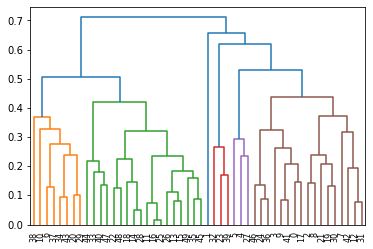

In [8]:
#Draw dendrogram
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='average'))

In [9]:
print(dendrogram['color_list'])
unique_colors=set(dendrogram['color_list'])

['C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C2', 'C0', 'C3', 'C3', 'C4', 'C4', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C5', 'C0', 'C0', 'C0', 'C0']


In [10]:
unique_colors

{'C0', 'C1', 'C2', 'C3', 'C4', 'C5'}

In [11]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [12]:
array=crime.values

In [13]:
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [14]:
st_scaler= StandardScaler().fit(array)
X =st_scaler.transform(array)
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [18]:
dbscan=DBSCAN(eps=0.9,min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.9)

In [19]:
#Noisy samples are given labels as -1
dbscan.labels_

array([-1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1,  0, -1, -1, -1,  0, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1,  0,
        0,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0],
      dtype=int64)

In [20]:
#calculate silhouette score or silhouette coefficient to check cluster optimacy
SilhouetteK=metrics.silhouette_score(df_norm, dbscan.labels_ , metric='euclidean')
SilhouetteK

0.2902838111106346

In [21]:
df=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [22]:
df

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,0
7,-1
8,-1
9,-1


In [26]:
#concatination of thr dataset & clusters
pd.concat([crime,df],axis=1)

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1
